In [2]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier



# py -m pip install matplotlib

In [3]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [4]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [5]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [6]:
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [10, 20, 30, 40, 50],  # Controls the maximum depth of the tree
    'min_samples_split': [10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4, 10],  # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Measures the quality of a split
}

random_search = RandomizedSearchCV(estimator=dt, 
                                   param_distributions=param_dist, 
                                   cv=5,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=50, min_samples_leaf=10, min_samples_split=20; total time=   0.4s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=10, min_samples_split=20; total time=   0.4s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=10, min_samples_split=20; total time=   0.4s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=10, min_samples_split=20; total time=   0.4s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=10, min_samples_split=20; total time=   0.4s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=10; total time=   0.5s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=10; total time=   0.5s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=10; total time=   0.4s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=10; total time=   0.4s
[CV] END criterion=gini, max_depth

In [5]:

best_model = DecisionTreeClassifier(     
    max_depth=50,
    min_samples_split=20,
    min_samples_leaf=4,
    criterion='entropy'
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9697798819478604
# F1: 0.7563816604708798
# AUC: 0.8881849502651066

Accuracy: 0.9766969995081161
F1: 0.7985114300903775
AUC: 0.8896118158713465


In [6]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

In [14]:
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [10, 20, 30, 40, 50],  # Controls the maximum depth of the tree
    'min_samples_split': [10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4, 10],  # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Measures the quality of a split
}

random_search = RandomizedSearchCV(estimator=dt, 
                                   param_distributions=param_dist, 
                                   cv=5,
                                   n_iter=100,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train_enn, y_train_enn)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.2s
[CV] END criterion=gini, max_depth=10,

Accuracy: 0.9735612395474668
F1: 0.7698072805139187
AUC: 0.8787886079237794


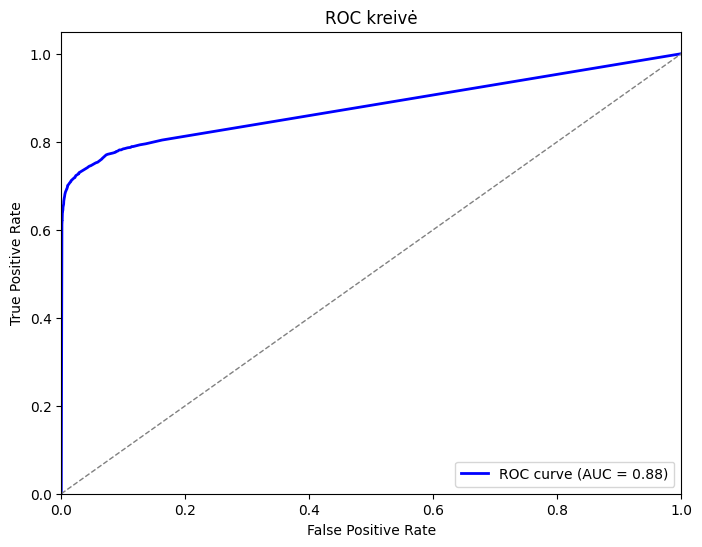

In [11]:

best_model_enn = DecisionTreeClassifier(     
    max_depth=30,
    min_samples_split=20,
    min_samples_leaf=4,
    criterion='gini'
)

best_model_enn.fit(X_train_enn, y_train_enn)

y_pred_enn = best_model_enn.predict(X_test)

accuracy_enn = accuracy_score(y_test, y_pred_enn)
print("Accuracy:", accuracy_enn)

f1_enn = f1_score(y_test, y_pred_enn)
print("F1:", f1_enn)

y_prob_enn = best_model_enn.predict_proba(X_test)[:, 1]
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test, y_prob_enn)
auc_score_enn = auc(fpr_enn, tpr_enn)
print("AUC:", auc_score_enn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_enn, tpr_enn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9697798819478604
# F1: 0.7563816604708798
# AUC: 0.8881849502651066

In [ ]:
best_model

<Axes: >

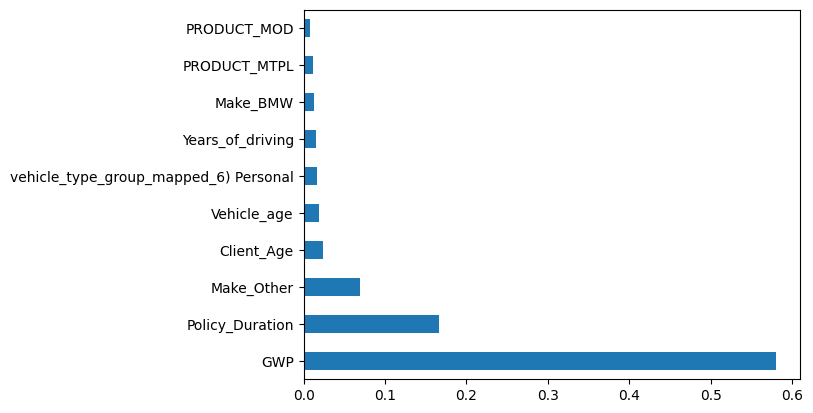

In [12]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [13]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

city_columns = [col for col in X_train_enn.columns if 'City' in col]
city_distributions = X_train_enn[city_columns].mean() 

weighted_importances_city = feat_importances[city_columns] * city_distributions

average_importance_city = weighted_importances_city.sum()         

print("Combined Feature Importance for 'City':", average_importance_city)

Combined Feature Importance for 'City': 0.002797885569180954


In [14]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

type_columns = [col for col in X_train_enn.columns if 'vehicle_type' in col]
type_distributions = X_train_enn[type_columns].mean() 

weighted_importances_type = feat_importances[type_columns] * type_distributions

average_importance_type = weighted_importances_type.sum()

print("Combined Feature Importance for 'type':", average_importance_type)

Combined Feature Importance for 'type': 0.015885357247156777


In [15]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

Duration_columns = [col for col in X_train_enn.columns if 'Duration' in col]
Duration_distributions = X_train_enn[Duration_columns].mean() 

weighted_importances_Duration = feat_importances[Duration_columns] * Duration_distributions

average_importance_Duration = weighted_importances_Duration.sum()

print("Combined Feature Importance for 'type':", average_importance_Duration)

Combined Feature Importance for 'type': 0.09784874220712098


In [16]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

PRODUCT_columns = [col for col in X_train_enn.columns if 'PRODUCT' in col]
PRODUCT_distributions = X_train_enn[PRODUCT_columns].mean() 

weighted_importances_PRODUCT = feat_importances[PRODUCT_columns] * PRODUCT_distributions

average_importance_PRODUCT = weighted_importances_PRODUCT.sum()

print("Combined Feature Importance for 'type':", average_importance_PRODUCT)

Combined Feature Importance for 'type': 0.010939907242994144


In [17]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

Make_columns = [col for col in X_train_enn.columns if 'Make' in col]
Make_distributions = X_train_enn[Make_columns].mean() 

weighted_importances_Make = feat_importances[Make_columns] * Make_distributions

average_importance_Make = weighted_importances_Make.sum()

print("Combined Feature Importance for 'type':", average_importance_Make)

Combined Feature Importance for 'type': 0.004288009227719559


In [18]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

Gender_columns = [col for col in X_train_enn.columns if 'Gender' in col]
Gender_distributions = X_train_enn[Gender_columns].mean() 

weighted_importances_Gender = feat_importances[Gender_columns] * Gender_distributions

average_importance_Gender = weighted_importances_Gender.sum()

print("Combined Feature Importance for 'type':", average_importance_Gender)

Combined Feature Importance for 'type': 0.0008833809034243671


In [19]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train_enn.columns)

Channel_columns = [col for col in X_train_enn.columns if 'Channel' in col]
Channel_distributions = X_train_enn[Channel_columns].mean() 

weighted_importances_Channel = feat_importances[Channel_columns] * Channel_distributions

average_importance_Channel = weighted_importances_Channel.sum()

print("Combined Feature Importance for 'type':", average_importance_Channel)

Combined Feature Importance for 'type': 0.006929596814132435


In [20]:
filtered_importances = feat_importances[~feat_importances.index.str.startswith('City_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Duration_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('vehicle_type_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('PRODUCT_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Make_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Gender_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Channel_')]

In [21]:
filtered_importances['average_importance_City'] = average_importance_city
filtered_importances['average_importance_Duration'] = average_importance_Duration
filtered_importances['average_importance_vehicle_type'] = average_importance_type
filtered_importances['average_importance_PRODUCT'] = average_importance_PRODUCT
filtered_importances['average_importance_Make'] = average_importance_Make
filtered_importances['average_importance_Gender'] = average_importance_Gender
filtered_importances['average_importance_Channel'] = average_importance_Channel

In [22]:
filtered_importances.nlargest(20).plot(kind='barh')

<Axes: >

In [8]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn']              

In [17]:
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [10, 20, 30, 40, 50],  # Controls the maximum depth of the tree
    'min_samples_split': [10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4, 10],  # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Measures the quality of a split
}

random_search = RandomizedSearchCV(estimator=dt, 
                                   param_distributions=param_dist, 
                                   cv=5,
                                   n_iter=100,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train_sm, y_train_sm)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   1.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.8s
[CV] END criterion=gini, max_depth=10,

Accuracy: 0.9530250860796852
F1: 0.6757215619694398
AUC: 0.8868248308262441


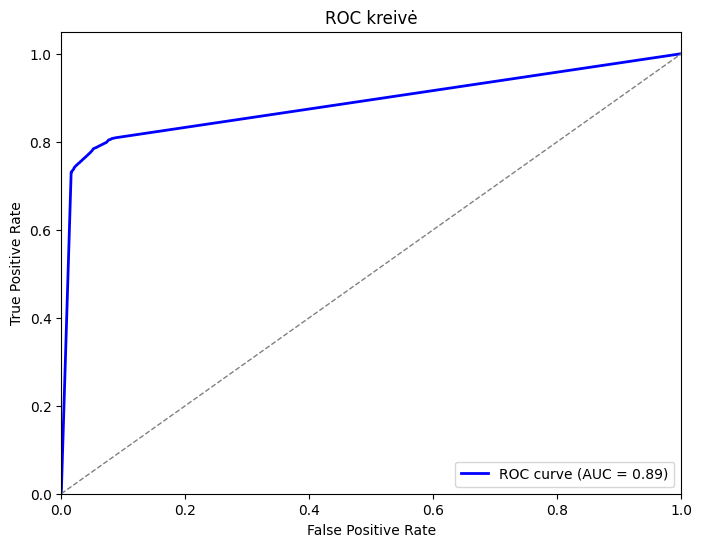

In [12]:

best_model = DecisionTreeClassifier(     
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=4,
    criterion='entropy'
)

best_model.fit(X_train_sm, y_train_sm)

y_pred_sm = best_model.predict(X_test)

accuracy_sm = accuracy_score(y_test, y_pred_sm)
print("Accuracy:", accuracy_sm)

f1_sm = f1_score(y_test, y_pred_sm)
print("F1:", f1_sm)

y_prob_sm = best_model.predict_proba(X_test)[:, 1]
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_prob_sm)
auc_score_sm = auc(fpr_sm, tpr_sm)
print("AUC:", auc_score_sm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9697798819478604
# F1: 0.7563816604708798
# AUC: 0.8881849502651066

In [10]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

In [11]:
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [10, 20, 30, 40, 50],  # Controls the maximum depth of the tree
    'min_samples_split': [10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4, 10],  # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Measures the quality of a split
}

random_search = RandomizedSearchCV(estimator=dt, 
                                   param_distributions=param_dist, 
                                   cv=5,
                                   n_iter=100,  
                                   scoring=f1_scorer,      
                                   verbose=2, 
                                   random_state=42)  # Use all available cores


random_search.fit(X_train_smt, y_train_smt)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=20; total time=   0.9s
[CV] END criterion=gini, max_depth=10,

In [13]:

best_model = DecisionTreeClassifier(     
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=4,
    criterion='entropy'
)

best_model.fit(X_train_smt, y_train_smt)

y_pred_smt = best_model.predict(X_test)

accuracy_smt = accuracy_score(y_test, y_pred_smt)
print("Accuracy:", accuracy_smt)

f1_smt = f1_score(y_test, y_pred_smt)
print("F1:", f1_smt)

y_prob_smt = best_model.predict_proba(X_test)[:, 1]
fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_prob_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
print("AUC:", auc_score_smt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_smt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9697798819478604
# F1: 0.7563816604708798
# AUC: 0.8881849502651066

Accuracy: 0.9539781111657649
F1: 0.6820981100021236
AUC: 0.8861772130306047


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}\n')


accuracy_enn = accuracy_score(y_test, y_pred_enn)
precision_enn = precision_score(y_test, y_pred_enn)
recall_enn = recall_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn)

print(f'Accuracy: {accuracy_enn:.4f}')
print(f'Precision: {precision_enn:.4f}')
print(f'Recall: {recall_enn:.4f}')
print(f'F1 Score: {f1_enn:.4f}\n')



accuracy_sm = accuracy_score(y_test, y_pred_sm)
precision_sm = precision_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)

print(f'Accuracy: {accuracy_sm:.4f}')
print(f'Precision: {precision_sm:.4f}')
print(f'Recall: {recall_sm:.4f}')
print(f'F1 Score: {f1_sm:.4f}\n')



accuracy_smt = accuracy_score(y_test, y_pred_smt)
precision_smt = precision_score(y_test, y_pred_smt)
recall_smt = recall_score(y_test, y_pred_smt)
f1_smt = f1_score(y_test, y_pred_smt)

print(f'Accuracy: {accuracy_smt:.4f}')
print(f'Precision: {precision_smt:.4f}')
print(f'Recall: {recall_smt:.4f}')
print(f'F1 Score: {f1_smt:.4f}\n')

Accuracy: 0.9522
Precision: 0.6031
Recall: 0.7590
F1 Score: 0.6721

Accuracy: 0.9757
Precision: 0.8773
Recall: 0.7252
F1 Score: 0.7941

Accuracy: 0.9530
Precision: 0.6095
Recall: 0.7581
F1 Score: 0.6757

Accuracy: 0.9540
Precision: 0.6156
Recall: 0.7648
F1 Score: 0.6821



In [16]:
cm = confusion_matrix(y_test, y_pred)
cm_enn = confusion_matrix(y_test, y_pred_enn)
cm_sm = confusion_matrix(y_test, y_pred_sm)
cm_smt = confusion_matrix(y_test, y_pred_smt)

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))  


sns.heatmap(cm_smt, ax=axes[0, 0], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[0, 0].set_title("SMOTE-Tomek")
axes[0, 0].set_xlabel("Spėjama klasė")
axes[0, 0].set_ylabel("Tikra klasė")

sns.heatmap(cm_sm, ax=axes[0, 1], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[0, 1].set_title("SMOTE")
axes[0, 1].set_xlabel("Spėjama klasė")
axes[0, 1].set_ylabel("Tikra klasė")

sns.heatmap(cm, ax=axes[1, 0], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[1, 0].set_title("Nesubalansuoti")
axes[1, 0].set_xlabel("Spėjama klasė")
axes[1, 0].set_ylabel("Tikra klasė")

sns.heatmap(cm_enn, ax=axes[1, 1], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[1, 1].set_title("Edited Nearest Neighbors")
axes[1, 1].set_xlabel("Spėjama klasė")
axes[1, 1].set_ylabel("Tikra klasė")


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(axes[0, 0].collections[0], cax=cbar_ax)


fig.suptitle("Sumaišymo matricos", fontsize=24, va='top')

plt.tight_layout(rect=[0, 0, 0.90, 0.97])  
plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_5472\3860385775.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 0.97])


In [19]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_enn, tpr_enn, color='purple', lw=2, label='ENN (AUC = %0.2f)' % auc_score_enn)
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label='SMOTE Tomek (AUC = %0.2f)' % auc_score_smt)
plt.plot(fpr, tpr, color='green', lw=2, label='Nebalansuota (AUC = %0.2f)' % auc_score)
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label='SMOTE (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

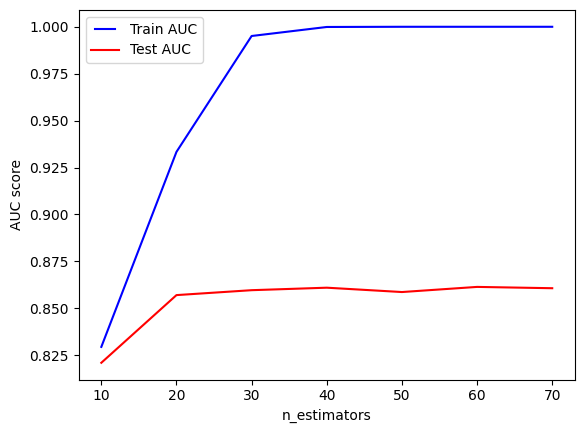

In [21]:
max_depths = [10, 20, 30, 40, 50, 60, 70]

train_results_nest = []
test_results_nest = []

for max_depth in max_depths:

     ds = DecisionTreeClassifier(max_depth=max_depth)
     ds.fit(X_train, y_train)
     train_pred = ds.predict(X_train)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     train_results_nest.append(roc_auc)
     y_pred = ds.predict(X_test)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     test_results_nest.append(roc_auc)

line1, = plt.plot(max_depths, train_results_nest, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results_nest, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


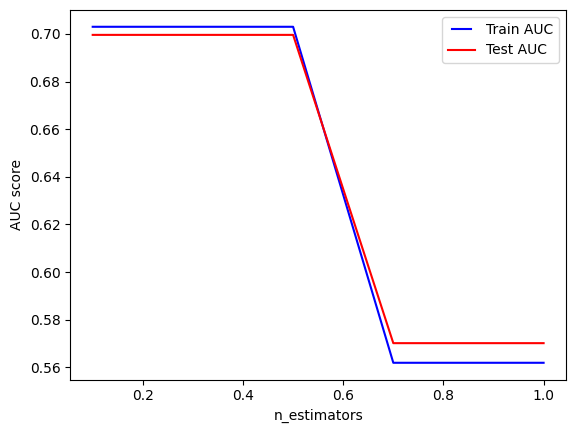

In [24]:
min_samples_splits=[1, 2, 5, 7, 9, 11, 13, 15, 17, 20]

train_results_nest = []
test_results_nest = []

for min_samples_split in min_samples_splits:

     ds = DecisionTreeClassifier(min_samples_split=min_samples_split)
     ds.fit(X_train, y_train)
     train_pred = ds.predict(X_train)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     train_results_nest.append(roc_auc)
     y_pred = ds.predict(X_test)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     test_results_nest.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results_nest, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results_nest, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


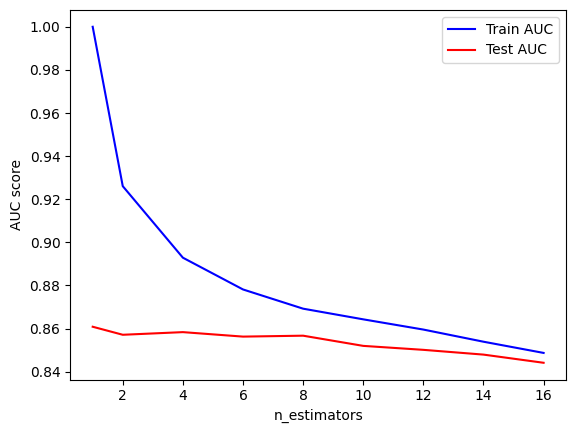

In [27]:
min_samples_leafs = [1, 2, 4, 6, 8, 10, 12, 14, 16]

train_results_nest = []
test_results_nest = []

for min_samples_leaf in min_samples_leafs:

     ds = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
     ds.fit(X_train, y_train)
     train_pred = ds.predict(X_train)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     train_results_nest.append(roc_auc)
     y_pred = ds.predict(X_test)
     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
     roc_auc = auc(false_positive_rate, true_positive_rate)
     test_results_nest.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results_nest, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results_nest, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
